# A brief introduction to plotting in `matplotlib`
(Víctor Sojo | vsojo@amnh.org)

Here we will briefly introduce plotting in `matplotlib` under the `pyplot` tool, which behaves very much like Matlab.

There are other ways of plotting in `matplotlib`, but the Matlab-like format of `pyplot` is pretty straightforward and I would recommend it.


**References:**
+ The [Matplotlib Pyplot tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html).

## Contents

&emsp;[Getting started](#Getting-started)<br/>
&emsp;&emsp;[Importing required libraries](#Importing-required-libraries)<br/>
&emsp;[The simplest matplotlib plot](#The-simplest-matplotlib-plot)<br/>
&emsp;[Axis names, plot title and legend](#Axis-names,-plot-title-and-legend)<br/>
&emsp;[Changing the point and line styles \(colours, dashes, point markers\)](#Changing-the-point-and-line-styles-\(colours,-dashes,-point-markers\))<br/>
&emsp;[Multiple curves in the same plot](#Multiple-curves-in-the-same-plot)<br/>
&emsp;[Multiple subplots](#Multiple-subplots)<br/>
&emsp;[Changing x and y limits](#Changing-x-and-y-limits)<br/>
&emsp;[Horizontal and vertical lines](#Horizontal-and-vertical-lines)<br/>
&emsp;[Other types of plot](#Other-types-of-plot)<br/>
&emsp;[Exporting plots to files](#Exporting-plots-to-files)<br/>
&emsp;[Better than matplotlib...](#Better-than-matplotlib...)<br/>
&emsp;&emsp;[Should I use Seaborn \(sns\)? No – use Plotly instead](#Should-I-use-Seaborn-\(sns\)?-No-–-use-Plotly-instead)<br/>
&emsp;&emsp;[Plotting in R+ggplot](#Plotting-in-R+ggplot)<br/>
&emsp;[Troubleshooting matplotlib](#Troubleshooting-matplotlib)<br/>

## Getting started
### Creating a conda environment
Let's first create a `conda` environment specifically for data analysis.

Open a new terminal or Anaconda prompt window and do the following:
```bash
conda update --all -y
conda create -n data python=3.9 jupyter pandas matplotlib plotly scikit-learn rpy2 r-essentials -y
```
(You will recognise some of those packages already. I will explain what the others do as we encounter them.)

Once you've completed installation, if you're looking at this notebook open inside Jupyter:
1. Press "Quit" (not "logout"!) on the main Jupyter browser window (or hit Ctrl+C twice on the tab of the terminal that's running Jupyter).
1. Close this notebook.
1. Activate and start Jupyter again, but from the newly created `data` environment:
```bash
conda activate data
jupyter notebook
```

If everything went well, the following should print out "`data`":

In [1]:
!echo $CONDA_DEFAULT_ENV

data


You should see `bioinfo` being printed out.

If you're on Windows, remember that every line starting with a `!`, such as `!my code` should be changed to `!wsl my code` and you should have an active [WSL installation](https://docs.microsoft.com/en-us/windows/wsl/install-win10)).

### Importing required libraries
We will need:

Module        | Use
:-------------|:-----------------------------------------
**matplotlib.pyplot**  | To plot figures using Python's main plotting tool
**%matplotlib inline** | Tells Jupyter to send plots to the cells directly, so that we can see them

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Note that we're giving `pyplot` an **alias** of `plt`. This is completely unnecessary but extremely common for some reason. Hardly anybody uses it any other way, so just get used to it.

## The simplest `matplotlib` plot

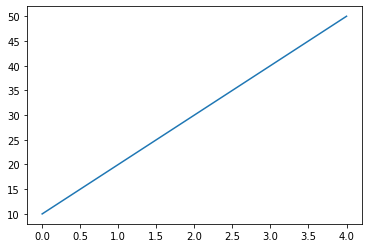

In [3]:
plt.plot([10, 20, 30, 40, 50])
plt.show()

And that's it. Great, isn't it?

As you can see, `matplotlib` defaults to the Y axis if you give it only a single list. But if we give it two, it logically reads them as `x` and `y`:

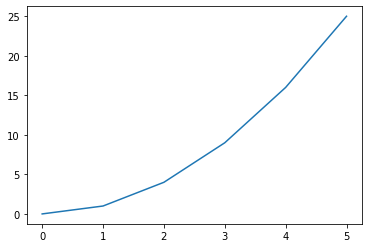

In [4]:
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])
plt.show()

Naturally, we can also use variables. Let's create a list of even numbers between 0 and 20, and calculate their cubes.

(Note: We will use **list comprehensions**, which we covered both in the [Python Workshop](https://github.com/vsojo/Python_Workshop/) and the [Python Refresher](https://github.com/vsojo/Python_Workshop/blob/master/JupyIntro_PythonRefresher.tar.gz))

In [5]:
bases = [n for n in range(21) if n%2==0]
cubes = [n**3 for n in bases] # This is a "list comprehension". They are cool. Read about them.
print(bases)
print(cubes)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[0, 8, 64, 216, 512, 1000, 1728, 2744, 4096, 5832, 8000]


And now plot:

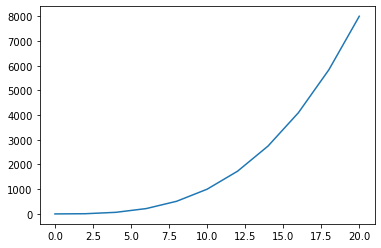

In [6]:
plt.plot(bases, cubes)
plt.show()

## Axis names, plot title and legend
These are all straightforward to add:

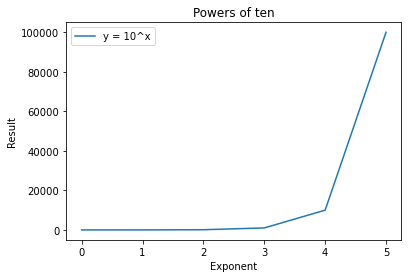

In [7]:
x = [0,1,2,3,4,5]
y = [10**i for i in x] # powers of ten

plt.plot(x, y, label='y = 10^x')
plt.title("Powers of ten")
plt.xlabel("Exponent")
plt.ylabel("Result")
plt.legend()
plt.show()

You can change the size of the text, the position of the legend, and so on. We won't cover that here, it's very easy to find online.

## Changing the point and line styles (colours, dashes, point markers)
This is slightly more involved:

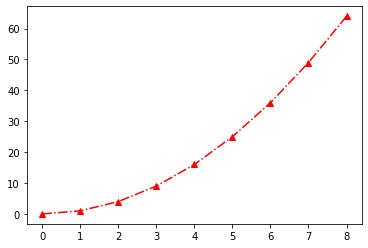

In [8]:
x = [0,1,2,3,4,5,6,7,8]
y = [i**2 for i in x] # squares

plt.plot(x, y, 'r^-.')
plt.show()

The `'r^-.'` in the third position tells `matplotlib` to use red triangles joined by dashes and dots. Similarly, `'bo-'` would mean "blue circles joined by a solid line, and `'g^--'` means "green triangles joined by a dashed line", `'ys:'` means "yellow squares, dotted line", and so on.

Remember that the following three attributes, if specified, must be given in the right order:
1. The X values.
2. The Y values.
3. The style of the curve and points.

The single-letter colour works fine for the 7 basic computer colours: `r`ed, `g`reen, `b`lue, `c`yan, `m`agenta, `y`ellow, and blac`k`. But if you want to use a different colour, you can leave out the colour and sapecify it on its own afterwards:

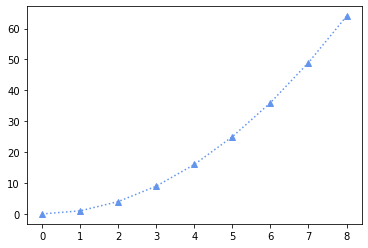

In [9]:
plt.plot(x, y, '^:', color='cornflowerblue')
plt.show()

This uses the traditional [list of named `CSS` colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) ubiquitous on the Internet.

You can specify an `#RGB` hex value instead:

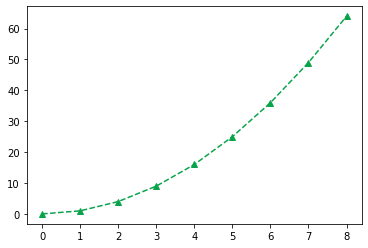

In [10]:
plt.plot(x, y, '^--', color='#09A34B')
plt.show()

## Multiple curves in the same plot
Easily done:

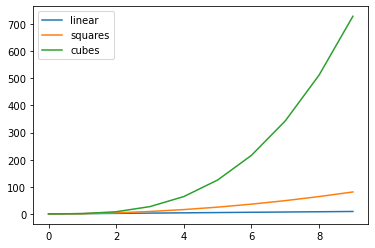

In [11]:
bases   = [n for n in range(10)]
squares = [n**2 for n in bases]
cubes   = [n**3 for n in bases]

plt.plot(bases, bases, bases, squares, bases, cubes)
plt.legend(("linear", "squares", "cubes"))
plt.show()

Actually, I find that pretty confusing; it's hard to tell what belongs with what.

What's happening above is we specified each set of data in pairs (`x` and `y`). But we can make use of the fact that Python doesn't care about indentation inside a `( )` block to produce longer but much more readable code:

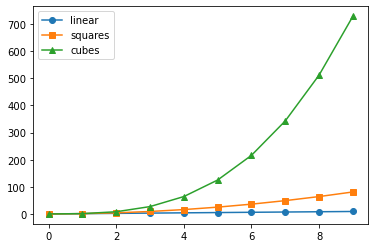

In [12]:
plt.plot(
    bases, bases,   'o-', # linear
    bases, squares, 's-', # squares
    bases, cubes,   '^-'  # cubes
)
plt.legend(("linear", "squares", "cubes"))
plt.show()

(here we added point markers)

Or if you find it clearer, you could simply send each curve to `plt` independently:

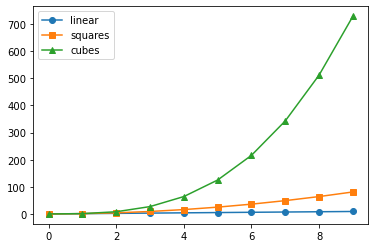

In [13]:
plt.plot(bases, bases  , 'o-' , label="linear")
plt.plot(bases, squares, 's-' , label="squares")
plt.plot(bases, cubes  , '^-' , label="cubes")
plt.legend()
plt.show()

Personally, I find this last method clearest of all, and it's also safest because the legend is always bound to its data, as opposed to being added afterwards.

Do note that there are plenty of choices for plotting (many more than I'm showing here).

## Multiple subplots
You can have multiple sub-plots grouped together. Let's start by creating some dummy data:

In [14]:
pow1 = [0, 1, 2, 3, 4, 5, 6]
pow2 = [i**2 for i in pow1]
pow3 = [i**3 for i in pow1]
pow4 = [i**4 for i in pow1]
pow5 = [i**5 for i in pow1]
pow6 = [i**6 for i in pow1]

Now let's plot each of these in Y, versus the linear one (`pow1`) in X:

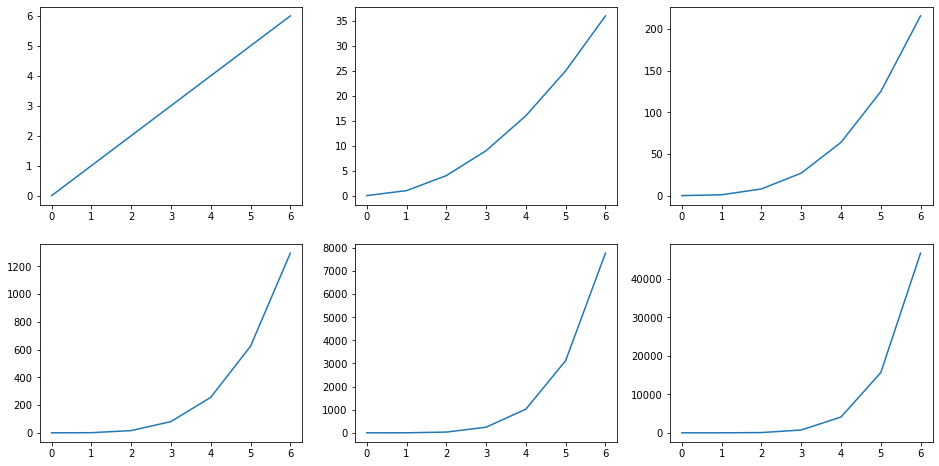

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.plot(pow1, pow1, label="Linear")
plt.subplot(232)
plt.plot(pow1, pow2, label="Power 2")
plt.subplot(233)
plt.plot(pow1, pow3, label="Power 3")
plt.subplot(234)
plt.plot(pow1, pow4, label="Power 4")
plt.subplot(235)
plt.plot(pow1, pow5, label="Power 5")
plt.subplot(236)
plt.plot(pow1, pow6, label="Power 6")
plt.show()

The above is, of course, horrible code. We should have created a for loop instead, but this will do for now.

The significant bit here is the number given to subplot. The first digit is the number of rows (2), then comes the number of columns (3), and then which plot you're trying to acces, say, for the 5th one, that would be `235`. Note that here the count does start at `1`, not `0`.

Another new thing here is that we specified the size of the figure above. You can always do that if the size is not working for you.
I didn't add titles or legends or anything like that because I wanted to keep the example simple, but the same properties apply here.

## Changing x and y limits
These can be controlled very easily. Assuming you still have the data in the previous section defined (otherwise go above and run the first cell where the `pow#` variables are defined):

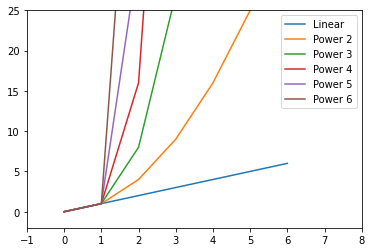

In [16]:
plt.plot(pow1, pow1, label="Linear")
plt.plot(pow1, pow2, label="Power 2")
plt.plot(pow1, pow3, label="Power 3")
plt.plot(pow1, pow4, label="Power 4")
plt.plot(pow1, pow5, label="Power 5")
plt.plot(pow1, pow6, label="Power 6")

plt.legend()
plt.xlim([-1,8])
plt.ylim([-2, 25])
plt.show()

## Horizontal and vertical lines
`matplotlib.pyplot` has (at least) two methods for plotting horizontal lines:
+ `axhline()` Makes infinite lines. It takes a single required parameter: which is the `y` value at which the line will be drawn.
+ `hlines()` Makes partial lines. It needs three parameters: the `y` position(s), and the values of `xstart` and `xend` at which the horizontal line should start and end.

The same applies to vertical lines, for the corresponding functions `axvline()` and `vlines()`.

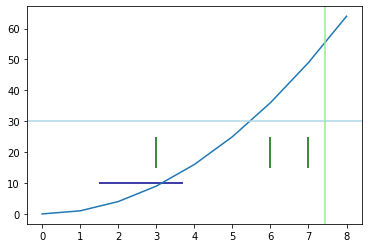

In [17]:
x = [0,1,2,3,4,5,6,7,8]
y = [i**2 for i in x] # squares
plt.plot(x,y)

plt.axhline(30, color="lightblue")
plt.hlines(10, 1.5, 3.7, color="darkblue")
plt.axvline(7.44, color="lightgreen")
plt.vlines([7,3,6], 15, 25, color="darkgreen")
plt.show()

As you can see, the `hlines` and `vlines` functions can take either a single value or a list in their first position. If a list is given, lines are drawn at all of those values.

## Other types of plot
This is not a lesson on plotting, but on using `matplotlib`. There are a myriad more things you can do with `matplotlib` that I haven't even bothered mentioning here, things like **boxplots**, **bar graphs**, **histograms**, **pie charts** (but _should you_?), **heat maps**, **3-D plots**, and much more. Here, I only wanted to expose you to the `matplotlib` syntax, so that you can go on your own and explore the other types... except pie chart... nobody should use them things.

Actually, I'll demonstrate that with an example:

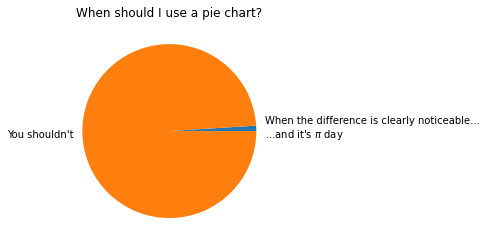

In [18]:
sizes = [1, 99]
labels = ["When the difference is clearly noticeable...\n...and it's " + r"$\pi$" + " day", "You shouldn't"]
plt.pie(sizes, labels=labels)
plt.title("When should I use a pie chart?")
plt.show()

Whatever you do, **NEVER EVER use 3-D perspective in a pie chart**. It becomes impossible to judge whether a thing that looks small is really small or only far away.

## Exporting plots to files
Easily done by using the pyplot method `.savefig()`, whose description is on their website as:
```python
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
```
Here's a simple example using the same details as in the last plot:

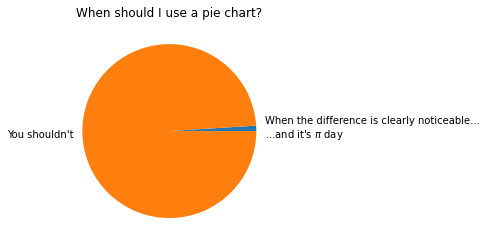

In [19]:
plt.pie(sizes, labels=labels)
plt.title("When should I use a pie chart?")
plt.savefig("MyFigure.pdf")

In my case at least, the figure is cut off in the PDF, even though it shows fine here in Jupyter. However, if I open the PDF on Inkscape, I can see the full text, so one easy solution would be to resize the canvas there if you're familiar with Inkscape.

A more elegant option is to make a tight-fitting box:

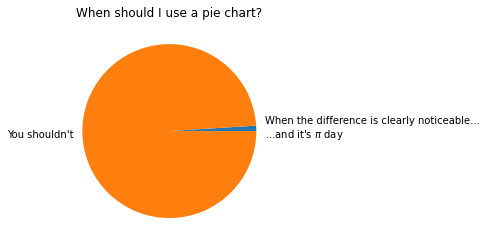

In [20]:
plt.pie(sizes, labels=labels)
plt.title("When should I use a pie chart?")
plt.savefig("MyFigure.pdf", bbox_inches='tight')

## Better than `matplotlib`...
### Should I use Seaborn (`sns`)? No – use Plotly instead
Many people use a library called Seaborn, typically aliased to `sns`, which provides a wrapper to `matplotlib`. It's all the rage with many geeks, but I can't say I have seen much of an advantage over simple `matplotlib`, so I don't think it's worth the effort of learning yet another syntax.

Just use `matplotlib` for the kind of basic plotting we did above. And if you really want a fancier plot (e.g. one that can be zoomed into and in which each dot has a pop-up legend), I suggest you skip Seaborn altogether and try [**Plotly**](https://plotly.com/python/) instead.

**Warning:** Plotly is distributed by a for-profit company that want to sell you something they call "Dash"; they keep pushing it every chance they get, often making you feel that Plotly won't work unless you also have Dash (it will!). **You do not need Dash**. Plotly is free and open source. Just ignore anything that says "Dash" on their website.

### Plotting in R+`ggplot`
We will see in the notebook about **Interfacing with R** that you can also use R's plotting methods in Jupyter, including `ggplot`.

## Troubleshooting `matplotlib`
Sometimes, `matplotlib` behaves very strangely. For example, during the preparation of this document I lost over an hour trying to solve a bug that wasn't a bug. It was just that `matplotlib` had gone a little crazy and was refusing to recognise one of its own methods. In my case, that was `.xlim()` and `.ylim()`, Python kept telling me that:
```bash
AttributeError: module 'matplotlib.pyplot' has no attribute 'xlim'
```

After quite a bit of searching through their official website, I found the answer on StackOverflow instead (the programmer's second best friend after the `print` statement).

If some strange irresolvable bug like this happens to you, I recommend you:
1. Update all of your conda:
```bash
conda deactivate
conda update --all -y
```
2. Restart Jupyter entirely, try again and see if that solves it.
3. If that still doesn't work, remove `matplotlib`:
```bash
conda uninstall matplotlib -y
```
4. And re-install it:
```bash
conda install matplotlib -y
```